In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score
import matplotlib.pyplot as plt

In [2]:
def lay_tat_ca_file(folder_path):
    danh_sach_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            danh_sach_files.append(os.path.join(root, file))
    return danh_sach_files

In [3]:
def lay_tat_ca_file(folder_path):
    danh_sach_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            danh_sach_files.append(os.path.join(root, file))
    return danh_sach_files

# Thay thế 'đường_dẫn_thư_mục' bằng đường dẫn thực tế của thư mục bạn muốn quét
folder_path = "./data/public/img/train"
all_im = lay_tat_ca_file(folder_path)
img_contrast_gray = []
img_contrast_rgb = []
img_contrast_mean = []
for im in all_im:
    img = cv2.imread(im)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_contrast_gray.append(round(gray_img.std(),0))
    img_contrast_rgb.append(round(rgb_img.std(),0))
    img_contrast_mean.append(round((gray_img.std()+rgb_img.std())/2,0))

In [4]:
print(len(img_contrast_gray)) 
print(len(img_contrast_rgb))   
print(len(img_contrast_mean))

4322
4322
4322


In [5]:
data = pd.DataFrame({'img':all_im, 'contrast_gray':img_contrast_gray, 'contrast_rgb':img_contrast_rgb, 'contrast_mean':img_contrast_mean})
data.sort_values(by=['contrast_mean'], inplace=True, ascending=False)
data.describe()

,contrast_gray,contrast_rgb,contrast_mean
count,4322.000000,4322.000000,4322.000000
mean,35.987043,42.124017,39.060851
std,12.938189,12.059038,12.074069
min,9.000000,11.000000,11.000000
25%,27.000000,34.000000,31.000000
50%,33.000000,40.000000,37.000000
75%,43.000000,49.000000,45.000000
max,84.000000,84.000000,83.000000


/home/binhng/anaconda3/envs/ucc/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


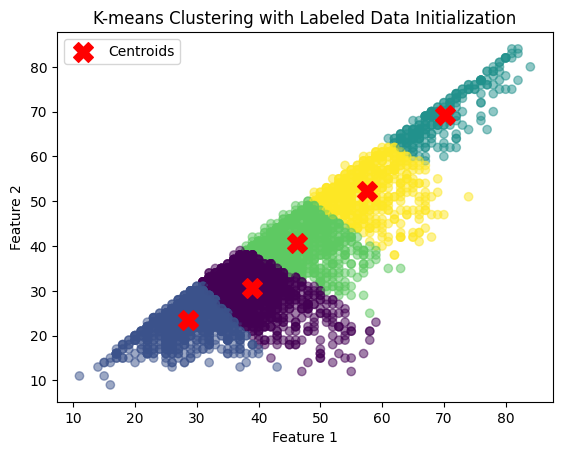

In [6]:
X = data[['contrast_rgb','contrast_gray']]
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

label = kmeans.labels_
centroids = kmeans.cluster_centers_
# Calculate accuracy (this is just for evaluation; in unsupervised settings, you wouldn't have true labels)


# Plot the results
import matplotlib.pyplot as plt

plt.scatter(X['contrast_rgb'], X['contrast_gray'], c=label, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering with Labeled Data Initialization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [7]:
# Thay thế 'đường_dẫn_thư_mục' bằng đường dẫn thực tế của thư mục bạn muốn quét
folder_path = "./data_after_augmentation/img"
all_im = lay_tat_ca_file(folder_path)
img_contrast_gray = []
img_contrast_rgb = []
img_contrast_mean = []
for im in all_im:
    img = cv2.imread(im)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_contrast_gray.append(round(gray_img.std(),0))
    img_contrast_rgb.append(round(rgb_img.std(),0))
    img_contrast_mean.append(round((gray_img.std()+rgb_img.std())/2,0))
aug_data = pd.DataFrame({'img':all_im, 'contrast_gray':img_contrast_gray, 'contrast_rgb':img_contrast_rgb, 'contrast_mean':img_contrast_mean})

In [10]:
aug_data['classify'] = kmeans.predict(aug_data[['contrast_rgb','contrast_gray']])
aug_data['classify'].value_counts()/7285

classify
0    0.309266
3    0.214688
1    0.207962
4    0.165408
2    0.102677
Name: count, dtype: float64